## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB as mnb
from sklearn.naive_bayes import GaussianNB as gnb
import warnings
warnings.filterwarnings('ignore')

## Importing Training & Testing Data 

In [2]:
traindf=pd.read_csv('SalaryData_Train.csv')
traindf

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
testdf=pd.read_csv('SalaryData_Test.csv')
testdf

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


## Handling Training Data

In [4]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
traindf.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [6]:
traindf.shape

(30161, 14)

In [7]:
traindf.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
traindf.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.043525,0.080152,0.060278,0.101598
educationno,0.043525,1.000000,0.124416,0.079691,0.152522
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000


## Handling Testing Data

In [9]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [10]:
testdf.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [11]:
testdf.shape

(15060, 14)

In [12]:
testdf.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [13]:
testdf.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.026123,0.078760,0.057745,0.102758
educationno,0.026123,1.000000,0.131750,0.085817,0.133691
capitalgain,0.078760,0.131750,1.000000,-0.031876,0.090501
capitalloss,0.057745,0.085817,-0.031876,1.000000,0.057712
hoursperweek,0.102758,0.133691,0.090501,0.057712,1.000000


## Data Visualization

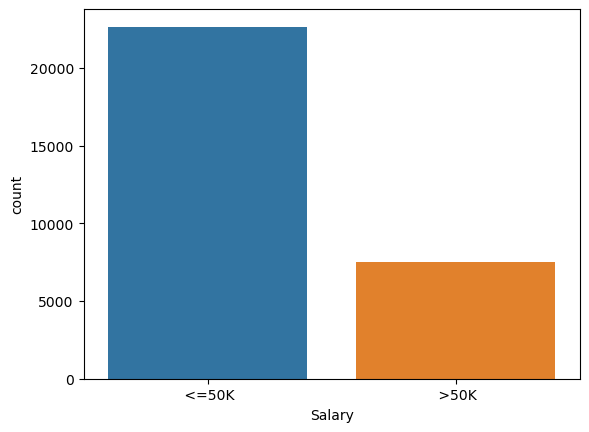

In [14]:
sns.countplot(x='Salary',data=traindf)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()

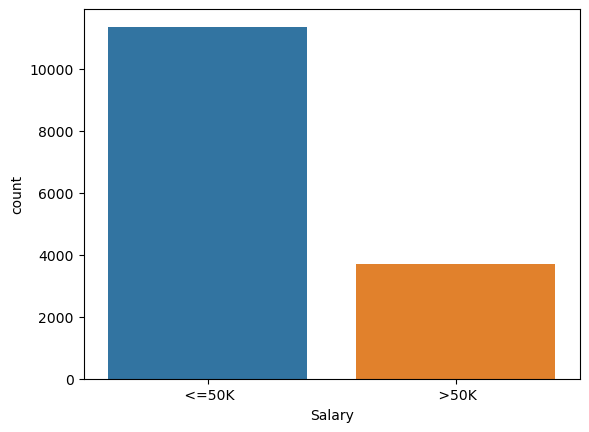

In [15]:
sns.countplot(x='Salary',data=testdf)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()

<Axes: >

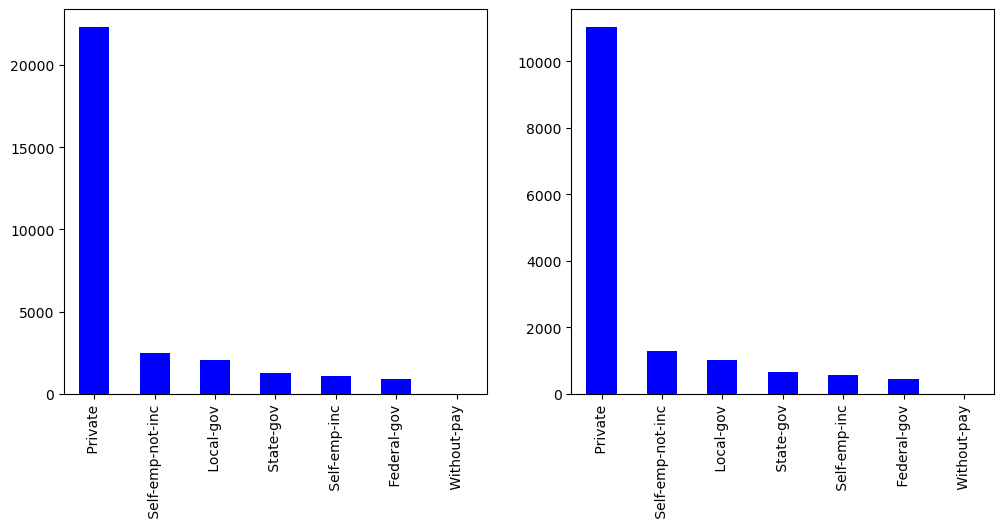

In [16]:
plt.figure(figsize=(12,5))
plt.subplot(121)
traindf.workclass.value_counts().plot.bar(color='blue')
plt.subplot(122)
testdf.workclass.value_counts().plot.bar(color='blue')

<Axes: >

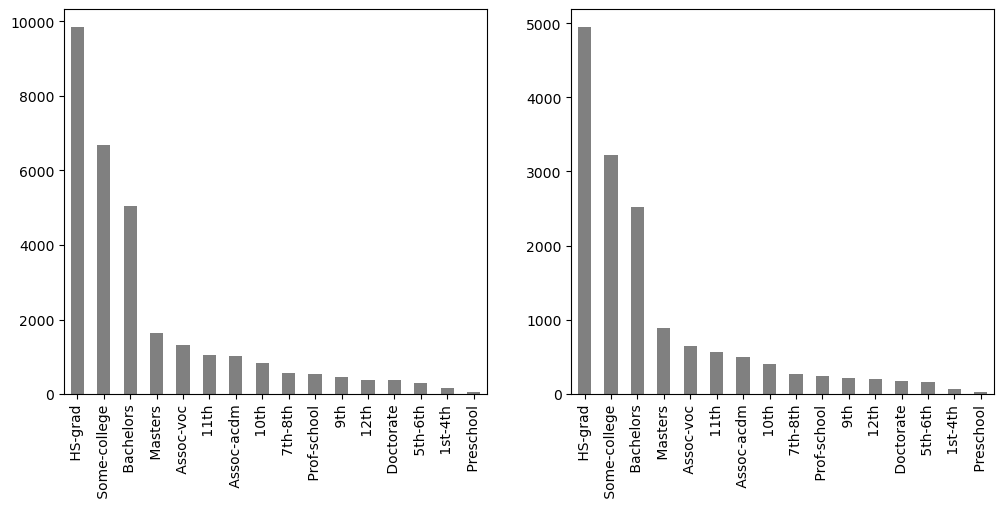

In [17]:
plt.figure(figsize=(12,5))
plt.subplot(121)
traindf.education.value_counts().plot.bar(color='grey')
plt.subplot(122)
testdf.education.value_counts().plot.bar(color='grey')

<Axes: >

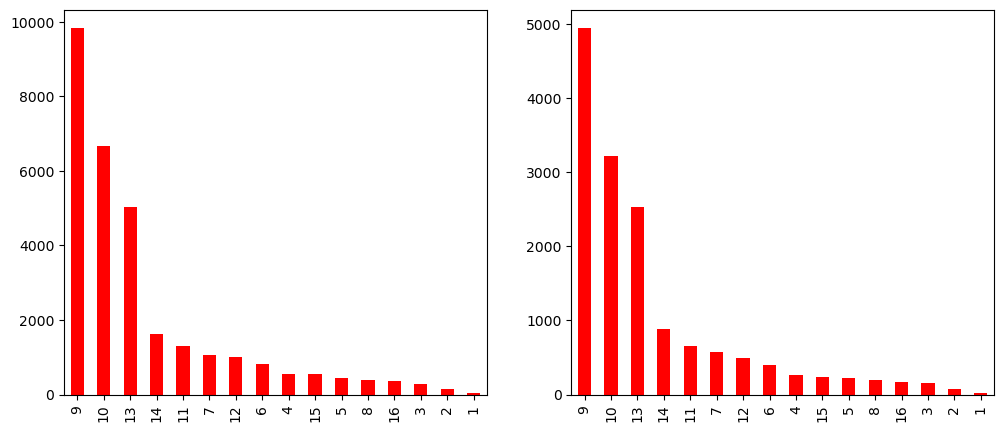

In [18]:
plt.figure(figsize=(12,5))
plt.subplot(121)
traindf.educationno.value_counts().plot.bar(color='red')
plt.subplot(122)
testdf.educationno.value_counts().plot.bar(color='red')

<Axes: >

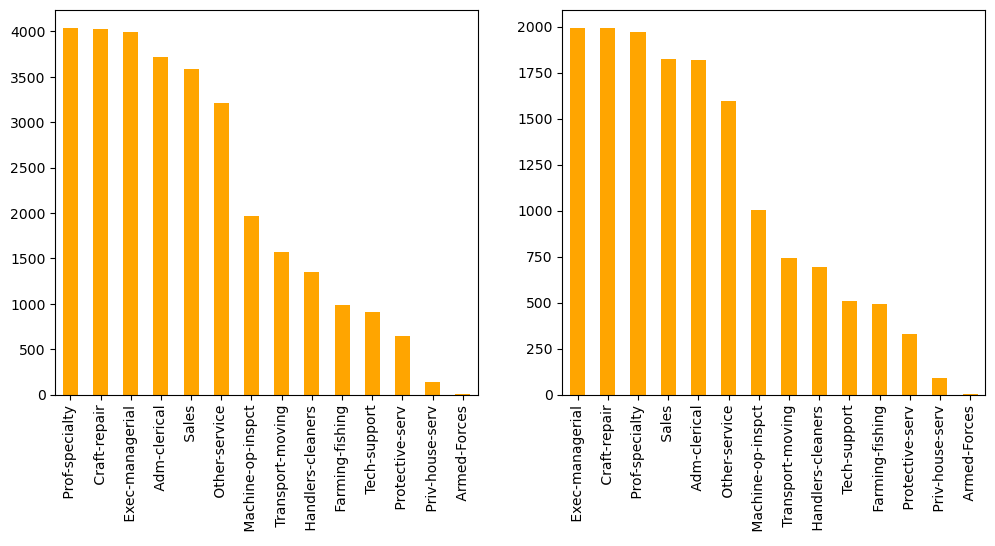

In [19]:
plt.figure(figsize=(12,5))
plt.subplot(121)
traindf.occupation.value_counts().plot.bar(color='orange')
plt.subplot(122)
testdf.occupation.value_counts().plot.bar(color='orange')

<Axes: >

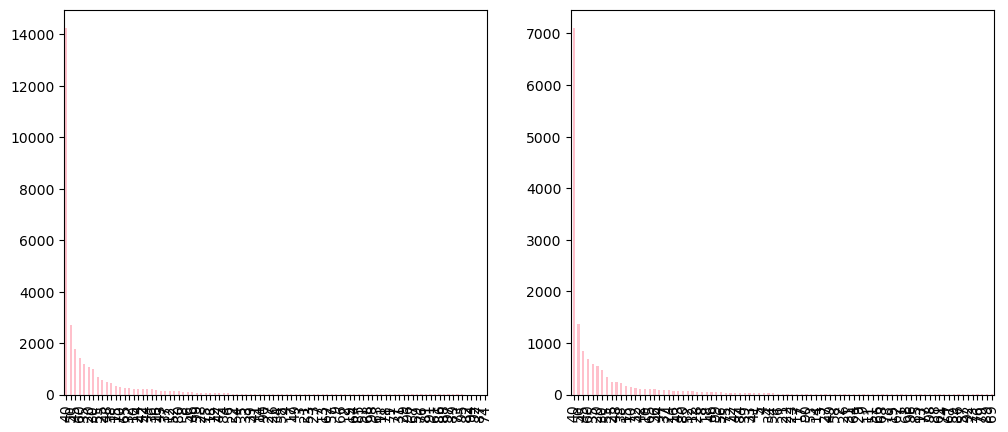

In [20]:
plt.figure(figsize=(12,5))
plt.subplot(121)
traindf.hoursperweek.value_counts().plot.bar(color='pink')
plt.subplot(122)
testdf.hoursperweek.value_counts().plot.bar(color='pink')

<Axes: >

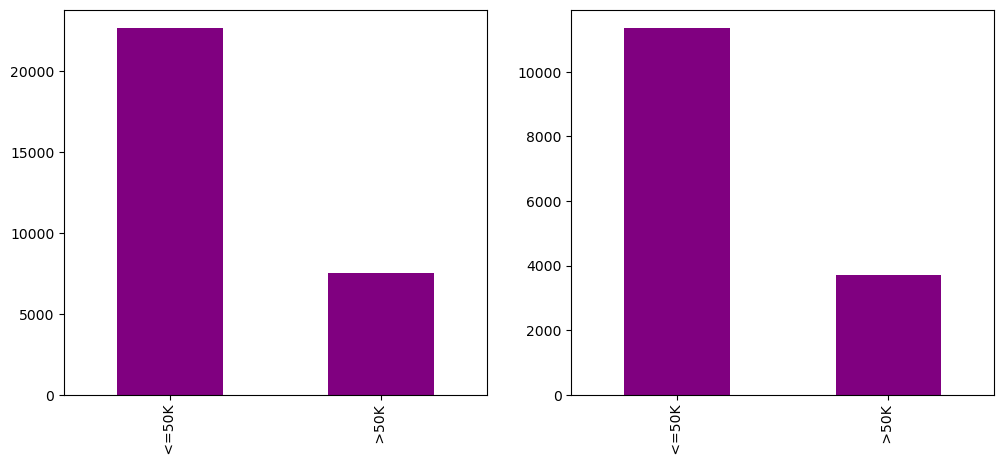

In [21]:
plt.figure(figsize=(12,5))
plt.subplot(121)
traindf.Salary.value_counts().plot.bar(color='purple')
plt.subplot(122)
testdf.Salary.value_counts().plot.bar(color='purple')

## Label Encoding

In [22]:
colnames = testdf.columns
colnames

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [23]:
num = LabelEncoder()
for i in colnames:
    traindf[i]=num.fit_transform(traindf[i])
    testdf[i]=num.fit_transform(testdf[i])

## Splitting the data

In [24]:
x_train = traindf[colnames[0:14]].values
y_train = traindf[colnames[-1]].values
x_test = testdf[colnames[0:14]].values
y_test = testdf[colnames[-1]].values

## Building the model

### Multinomial Naive Bayes

In [25]:
model1=mnb()
train_pred_multi = model1.fit(x_train,y_train).predict(x_train)
test_pred_multi = model1.fit(x_train,y_train).predict(x_test)  

In [26]:
train_acc_multi = np.mean(train_pred_multi==y_train)
train_acc_multi

0.7803454792612977

In [27]:
test_acc_multi = np.mean(test_pred_multi==y_test)
test_acc_multi

0.7827357237715803

### Gaussian Navie Bayes

In [28]:
model2=gnb()
train_pred_gau = model2.fit(x_train,y_train).predict(x_train)
test_pred_gau = model2.fit(x_train,y_train).predict(x_test)

In [29]:
train_acc_gau = np.mean(train_pred_gau==y_train)
train_acc_gau

1.0

In [30]:
test_acc_gau = np.mean(test_pred_gau==y_test)
test_acc_gau

1.0